# Data

In [1]:
with open("data/shakespeare.txt", mode="r", encoding="utf-8") as f:
    text = f.read()

In [2]:
print(text[:500])

First Citizen:
Before we proceed any further, hear me speak.

All:
Speak, speak.

First Citizen:
You are all resolved rather to die than to famish?

All:
Resolved. resolved.

First Citizen:
First, you know Caius Marcius is chief enemy to the people.

All:
We know't, we know't.

First Citizen:
Let us kill him, and we'll have corn at our own price.
Is't a verdict?

All:
No more talking on't; let it be done: away, away!

Second Citizen:
One word, good citizens.

First Citizen:
We are accounted poor


In [3]:
print(f"# chars: {len(text)}")

# chars: 1115394


In [4]:
vocab = sorted(list(set(text)))

vocab_size = len(vocab)
print(f"Vocab size: {vocab_size}")

"".join(vocab)

Vocab size: 65


"\n !$&',-.3:;?ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz"

In [5]:
char_to_int = {c: i for (i, c) in enumerate(vocab)}
int_to_char = {i: c for (i, c) in enumerate(vocab)}

encode = lambda chars: [char_to_int[c] for c in chars]
decode = lambda ints: "".join([int_to_char[i] for i in ints])

test_text = "hello world"
encoded_text = encode(test_text)
print(encoded_text)
print(decode(encoded_text))

[46, 43, 50, 50, 53, 1, 61, 53, 56, 50, 42]
hello world


In [6]:
import torch

data = torch.tensor(encode(text), dtype=torch.int64)
print(data.shape)

data[:500]

torch.Size([1115394])


tensor([18, 47, 56, 57, 58,  1, 15, 47, 58, 47, 64, 43, 52, 10,  0, 14, 43, 44,
        53, 56, 43,  1, 61, 43,  1, 54, 56, 53, 41, 43, 43, 42,  1, 39, 52, 63,
         1, 44, 59, 56, 58, 46, 43, 56,  6,  1, 46, 43, 39, 56,  1, 51, 43,  1,
        57, 54, 43, 39, 49,  8,  0,  0, 13, 50, 50, 10,  0, 31, 54, 43, 39, 49,
         6,  1, 57, 54, 43, 39, 49,  8,  0,  0, 18, 47, 56, 57, 58,  1, 15, 47,
        58, 47, 64, 43, 52, 10,  0, 37, 53, 59,  1, 39, 56, 43,  1, 39, 50, 50,
         1, 56, 43, 57, 53, 50, 60, 43, 42,  1, 56, 39, 58, 46, 43, 56,  1, 58,
        53,  1, 42, 47, 43,  1, 58, 46, 39, 52,  1, 58, 53,  1, 44, 39, 51, 47,
        57, 46, 12,  0,  0, 13, 50, 50, 10,  0, 30, 43, 57, 53, 50, 60, 43, 42,
         8,  1, 56, 43, 57, 53, 50, 60, 43, 42,  8,  0,  0, 18, 47, 56, 57, 58,
         1, 15, 47, 58, 47, 64, 43, 52, 10,  0, 18, 47, 56, 57, 58,  6,  1, 63,
        53, 59,  1, 49, 52, 53, 61,  1, 15, 39, 47, 59, 57,  1, 25, 39, 56, 41,
        47, 59, 57,  1, 47, 57,  1, 41, 

In [7]:
val_split = 0.1
n_val_samples = int(len(data) * val_split)

val_data = data[:n_val_samples]
train_data = data[n_val_samples:]

val_data.shape, train_data.shape

(torch.Size([111539]), torch.Size([1003855]))

In [8]:
block_size = 8
train_data[:block_size + 1]

tensor([43, 58,  6,  1, 25, 39, 56, 41, 47])

In [9]:
x = train_data[:block_size]
y = train_data[1:block_size + 1]

print(x, y)

for i in range(block_size):
    print(f"{x[:i+1], y[i]}")

tensor([43, 58,  6,  1, 25, 39, 56, 41]) tensor([58,  6,  1, 25, 39, 56, 41, 47])
(tensor([43]), tensor(58))
(tensor([43, 58]), tensor(6))
(tensor([43, 58,  6]), tensor(1))
(tensor([43, 58,  6,  1]), tensor(25))
(tensor([43, 58,  6,  1, 25]), tensor(39))
(tensor([43, 58,  6,  1, 25, 39]), tensor(56))
(tensor([43, 58,  6,  1, 25, 39, 56]), tensor(41))
(tensor([43, 58,  6,  1, 25, 39, 56, 41]), tensor(47))


In [10]:
batch_size = 4

def get_batch(data):
    inds = torch.randint(len(data) - block_size - 1, size=(batch_size,))
    x = torch.stack([data[i:i+block_size] for i in inds])
    y = torch.stack([data[i+1:i+block_size+1] for i in inds])
    return x, y

x, y = get_batch(train_data)

print(x.shape)
print(x)

print(y.shape)
print(y)

torch.Size([4, 8])
tensor([[57,  1, 53, 44,  1, 51, 53, 42],
        [43, 39, 56, 50, 47, 52, 43, 57],
        [ 1, 58, 46, 47, 57,  1, 59, 57],
        [ 1, 46, 47, 57,  1, 57, 53, 59]])
torch.Size([4, 8])
tensor([[ 1, 53, 44,  1, 51, 53, 42, 43],
        [39, 56, 50, 47, 52, 43, 57, 57],
        [58, 46, 47, 57,  1, 59, 57, 59],
        [46, 47, 57,  1, 57, 53, 59, 50]])


# Bigram model

In [11]:
import torch.nn as nn
from torch.nn import functional as F

class BigramModel(nn.Module):
    def __init__(self, vocab_size):
        super().__init__()
        self.token_embedding = nn.Embedding(vocab_size, vocab_size)
        
    def forward(self, inputs, targets=None):
        # inputs and targets are (B, T).
        logits = self.token_embedding(inputs)  # (B, T, C).
        
        loss = None
        
        # Calc cross-entropy loss.
        if targets != None:
            B, T, C = logits.shape
            logits = logits.view(B*T, C)

            targets = targets.view(B*T)
            loss = F.cross_entropy(logits, targets)
        
        return logits, loss
    
    def generate(self, tokens, n_tokens):
        for i in range(n_tokens):
            logits, _ = self(tokens)  # (B, T, C)
            logits = logits[:, -1, :]  # only use last pred col. (B, C)
            
            probs = F.softmax(logits, dim=-1)
            next_tokens = torch.multinomial(probs, num_samples=1)
            
            tokens = torch.cat((tokens, next_tokens), dim=-1)  # append. (B, T+1)
        
        return tokens

In [12]:
bigram_model = BigramModel(vocab_size)
logits, loss = bigram_model(x, y)
logits.shape, loss.shape

(torch.Size([32, 65]), torch.Size([]))

In [13]:
import math

print(loss)
print(math.log(65))  # -ln(e^x/sum(e^x)) -> -ln(1/65) -> ln(65)

tensor(5.1572, grad_fn=<NllLossBackward0>)
4.174387269895637


In [14]:
starting_tokens = torch.tensor([[0]], dtype=torch.int64)
tokens = bigram_model.generate(starting_tokens, n_tokens=100)[0]

print(decode(tokens.tolist()))


ItwycGonLX?r!SNcbS:s!HeBw'&A'NHGFZAP&,p??-
jyEdls
jaVQIggoENnch,oEGYyKXTM:Vw lPYCt?gjbJjmjYgAra'v3$u


In [15]:
optimizer = torch.optim.Adam(bigram_model.parameters(), lr=1e-3)

batch_size = 32

losses = []
for steps in range(10_000):
    xb, yb = get_batch(train_data)
    
    logits, loss = bigram_model(xb, targets=yb)
    losses.append(loss.item())
    
    optimizer.zero_grad(set_to_none=True)
    loss.backward()
    optimizer.step()
    
print(losses[-1])

2.468991279602051


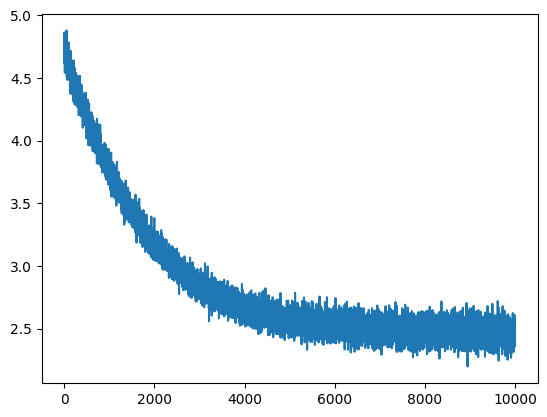

In [16]:
import matplotlib.pyplot as plt

plt.plot(losses)

In [17]:
starting_tokens = torch.tensor([[0]], dtype=torch.int64)
tokens = bigram_model.generate(starting_tokens, n_tokens=500)[0]

print(decode(tokens.tolist()))



Le ss tr fGadnor:
LISug- are fou THalire;
Whan w
IVISLBEThtowhevim NCKIsis ntof I bl arore
S nath twainou fun the,

Mulech bupe any lunthit?
LI t pis wias
Tend, bingensthaig BLYO:
Ay O:
G xe II f s thathe hiraco l, garanged.

BERTOF d, ano
And,
MO: ounknd.
H:
Pipate m bore,
An bue tem o rep, d ELond, bl meerayontinginfe plf d dlitag ll
LO, orests br n thado t t los as FELIs ner p m CIN:
PRDIfomer jurr d Cam, I?
He ceeayougheais. irquar:
INUKI:
fou? sou I' tofomprs,
PEMalltedos;
Fo?
AThouk,
An l


# Attention (math trick)

In [18]:
B, T, C = 4, 8, 2

x = torch.randn(B, T, C)
x.shape

torch.Size([4, 8, 2])

In [19]:
x_bow = torch.zeros((B, T, C))
for b in range(B):
    for t in range(T):
        x_prev = x[b, :t+1]
        x_bow[b, t] = torch.mean(x_prev, 0)  # average all previous values together (channels separate).

In [20]:
x[0], x_bow[0]

(tensor([[-0.2745, -0.5024],
         [-0.7707, -0.4999],
         [-1.3049,  0.2485],
         [-0.1303,  0.7389],
         [ 0.2789,  0.3013],
         [ 0.8056,  1.2135],
         [ 0.1891, -1.1090],
         [ 1.0258,  0.0120]]),
 tensor([[-0.2745, -0.5024],
         [-0.5226, -0.5012],
         [-0.7834, -0.2513],
         [-0.6201, -0.0037],
         [-0.4403,  0.0573],
         [-0.2327,  0.2500],
         [-0.1724,  0.0558],
         [-0.0226,  0.0504]]))

In [21]:
a = torch.tril(torch.ones(3, 3, dtype=torch.float32))
a = a / a.sum(dim=-1, keepdim=True)

b = torch.randint(0, 10, size=(3, 2), dtype=torch.float32)
c = a @ b

a, b, c

(tensor([[1.0000, 0.0000, 0.0000],
         [0.5000, 0.5000, 0.0000],
         [0.3333, 0.3333, 0.3333]]),
 tensor([[8., 2.],
         [2., 6.],
         [3., 4.]]),
 tensor([[8.0000, 2.0000],
         [5.0000, 4.0000],
         [4.3333, 4.0000]]))

In [22]:
x.shape

torch.Size([4, 8, 2])

In [23]:
wei = torch.tril(torch.ones((T, T), dtype=torch.float32))
wei = wei / wei.sum(dim=-1, keepdim=True)
wei

tensor([[1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.5000, 0.5000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.3333, 0.3333, 0.3333, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.2500, 0.2500, 0.2500, 0.2500, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.2000, 0.2000, 0.2000, 0.2000, 0.2000, 0.0000, 0.0000, 0.0000],
        [0.1667, 0.1667, 0.1667, 0.1667, 0.1667, 0.1667, 0.0000, 0.0000],
        [0.1429, 0.1429, 0.1429, 0.1429, 0.1429, 0.1429, 0.1429, 0.0000],
        [0.1250, 0.1250, 0.1250, 0.1250, 0.1250, 0.1250, 0.1250, 0.1250]])

In [24]:
x_bow2 = wei @ x  # (B, T, T) @ (B, T, C) -> (B, T, C)
x_bow2

tensor([[[-0.2745, -0.5024],
         [-0.5226, -0.5012],
         [-0.7834, -0.2513],
         [-0.6201, -0.0037],
         [-0.4403,  0.0573],
         [-0.2327,  0.2500],
         [-0.1724,  0.0558],
         [-0.0226,  0.0504]],

        [[-0.1106,  0.3791],
         [-0.5051,  0.8529],
         [-0.2476,  0.7661],
         [ 0.4020,  0.7546],
         [ 0.3778,  0.7916],
         [ 0.4181,  0.5796],
         [ 0.2633,  0.4537],
         [ 0.2319,  0.4180]],

        [[-0.2387, -1.4486],
         [-0.5862, -0.7387],
         [-0.2943, -0.2124],
         [-0.2576, -0.7830],
         [-0.5348, -0.6620],
         [-0.4173, -0.2891],
         [-0.3246, -0.1584],
         [-0.2876,  0.0912]],

        [[-0.6427,  0.1674],
         [-0.3993,  0.0986],
         [-0.2544,  0.4429],
         [ 0.2465,  0.6602],
         [-0.3701,  0.6774],
         [-0.2342,  0.5351],
         [-0.1992,  0.2105],
         [-0.1077, -0.0388]]])

In [25]:
x_bow.allclose(x_bow2)

True

In [26]:
tril = torch.tril(torch.ones((T, T), dtype=torch.float32))

wei = torch.zeros((T, T))
wei = wei.masked_fill(tril == 0, float("-inf"))

wei

tensor([[0., -inf, -inf, -inf, -inf, -inf, -inf, -inf],
        [0., 0., -inf, -inf, -inf, -inf, -inf, -inf],
        [0., 0., 0., -inf, -inf, -inf, -inf, -inf],
        [0., 0., 0., 0., -inf, -inf, -inf, -inf],
        [0., 0., 0., 0., 0., -inf, -inf, -inf],
        [0., 0., 0., 0., 0., 0., -inf, -inf],
        [0., 0., 0., 0., 0., 0., 0., -inf],
        [0., 0., 0., 0., 0., 0., 0., 0.]])

In [27]:
wei = F.softmax(wei, dim=-1)
wei

tensor([[1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.5000, 0.5000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.3333, 0.3333, 0.3333, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.2500, 0.2500, 0.2500, 0.2500, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.2000, 0.2000, 0.2000, 0.2000, 0.2000, 0.0000, 0.0000, 0.0000],
        [0.1667, 0.1667, 0.1667, 0.1667, 0.1667, 0.1667, 0.0000, 0.0000],
        [0.1429, 0.1429, 0.1429, 0.1429, 0.1429, 0.1429, 0.1429, 0.0000],
        [0.1250, 0.1250, 0.1250, 0.1250, 0.1250, 0.1250, 0.1250, 0.1250]])

In [28]:
x_bow3 = wei @ x
torch.allclose(x_bow, x_bow3)

True

# Attention

In [29]:
B, T, C = 4, 8, 32

token_embeddings = torch.randn(B, T, C)
token_embeddings.shape

torch.Size([4, 8, 32])

In [30]:
head_size = 16
key = nn.Linear(C, head_size, bias=False)
query = nn.Linear(C, head_size, bias=False)
value = nn.Linear(C, head_size, bias=False)

k = key(token_embeddings)  # B, T, head_size
q = query(token_embeddings)
v = value(token_embeddings)

k.shape, q.shape, v.shape

(torch.Size([4, 8, 16]), torch.Size([4, 8, 16]), torch.Size([4, 8, 16]))

In [31]:
wei = q @ k.transpose(-2, -1)  # (B, T, head_size) @ (B, head_size, T) -> (B, T, T)
# Affinities between each key and each query!.
wei.shape

torch.Size([4, 8, 8])

In [32]:
# Scale wei.
wei = wei * (head_size ** -0.5)

In [33]:
tril = torch.tril(torch.ones(T, T, dtype=torch.int64))
wei = wei.masked_fill(tril == 0, float("-inf"))
wei = F.softmax(wei, dim=-1)
wei.shape

torch.Size([4, 8, 8])

In [34]:
wei[0]  # affinities between each key and query, with no future-peeking and smoothed.

tensor([[1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.4643, 0.5357, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.3192, 0.2830, 0.3977, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.2829, 0.3524, 0.1444, 0.2203, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.2686, 0.1696, 0.1712, 0.2599, 0.1308, 0.0000, 0.0000, 0.0000],
        [0.1642, 0.1666, 0.1892, 0.0897, 0.2494, 0.1409, 0.0000, 0.0000],
        [0.1422, 0.1257, 0.1332, 0.1800, 0.1618, 0.1347, 0.1224, 0.0000],
        [0.1109, 0.0975, 0.1186, 0.1107, 0.1194, 0.1362, 0.1565, 0.1502]],
       grad_fn=<SelectBackward0>)

In [35]:
v[0, :, :2]

tensor([[-0.6093,  0.6012],
        [ 0.3015, -1.0873],
        [-0.3569, -0.5215],
        [-0.1153,  0.3302],
        [ 0.2422,  0.0451],
        [-0.3631,  0.1389],
        [-0.4427, -0.4935],
        [-0.4467,  0.9856]], grad_fn=<SliceBackward0>)

In [36]:
out = wei @ v  # weighted mean (by k-q affinities) of values. 
out.shape  # (B, T, head_size)

torch.Size([4, 8, 16])

# Layer Norm

In [47]:
x = torch.randn((32, 100))
x.shape

torch.Size([32, 100])

In [48]:
y = torch.nn.LayerNorm(100)(x)
y.shape

torch.Size([32, 100])

In [49]:
y[:,0].mean(), y[:,0].std()

(tensor(-0.0568, grad_fn=<MeanBackward0>),
 tensor(0.9049, grad_fn=<StdBackward0>))

In [50]:
y[0, :].mean(), y[0, :].std()

(tensor(-4.7684e-09, grad_fn=<MeanBackward0>),
 tensor(1.0050, grad_fn=<StdBackward0>))